# K Means Clustering Project
For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

It is very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

# The Data
We will use a data frame with 777 observations on the following 18 variables.

1.Private A factor with levels No and Yes indicating private or public university------------------------------------------------------------------
2.Apps Number of applications received----------------------------------------------------------------------------------------
3.Accept Number of applications accepted------------------------------------------------------------------------------------------
4.Enroll Number of new students enrolled------------------------------------------------------------------------------------------
5.Top10perc Pct. new students from top 10% of H.S. class--------------------------------------------------------------------------
6.Top25perc Pct. new students from top 25% of H.S. class--------------------------------------------------------------------------
7.F.Undergrad Number of fulltime undergraduates-----------------------------------------------------------------------------------
8.P.Undergrad Number of parttime undergraduates-----------------------------------------------------------------------------------
9.Outstate Out-of-state tuition---------------------------------------------------------------------------------------------------
10.Room.Board Room and board costs------------------------------------------------------------------------------------------
11.Books Estimated book costs------------------------------------------------------------------------------------------
12.Personal Estimated personal spending------------------------------------------------------------------------------------------
13.PhD Pct. of faculty with Ph.D.’s------------------------------------------------------------------------------------------
14.Terminal Pct. of faculty with terminal degree-----------------------------------------------------------------------------------
15.S.F.Ratio Student/faculty ratio------------------------------------------------------------------------------------------
16.perc.alumni Pct. alumni who donate------------------------------------------------------------------------------------------
17.Expend Instructional expenditure per student------------------------------------------------------------------------------------
18.Grad.Rate Graduation rate------------------------------------------------------------------------------------------

In [10]:
import pandas as pd
import numpy as np

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('College_Data',index_col=0)

In [13]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [15]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


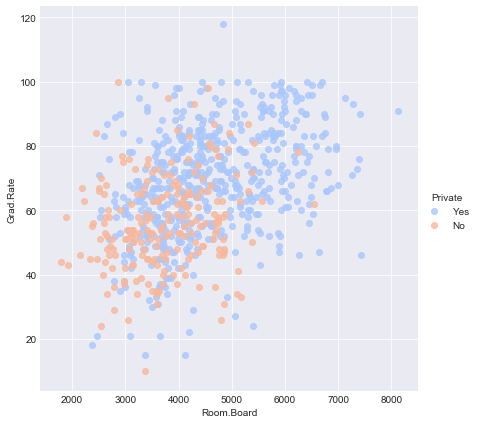

In [16]:
sns.lmplot(x='Room.Board',y='Grad.Rate',data=df,hue='Private',fit_reg=False,
          palette='coolwarm',size=6,aspect=1)

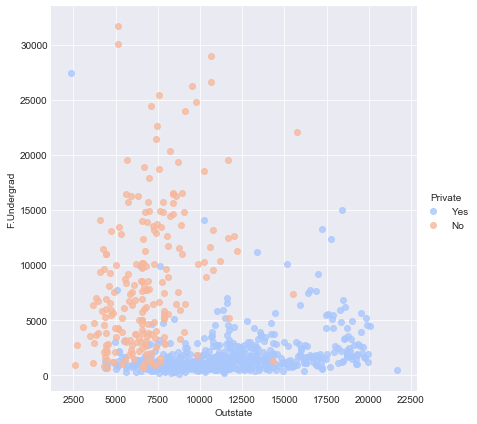

In [17]:
sns.lmplot(x='Outstate',y='F.Undergrad',hue='Private',data=df,fit_reg=False,
          palette='coolwarm',size=6,aspect=1)

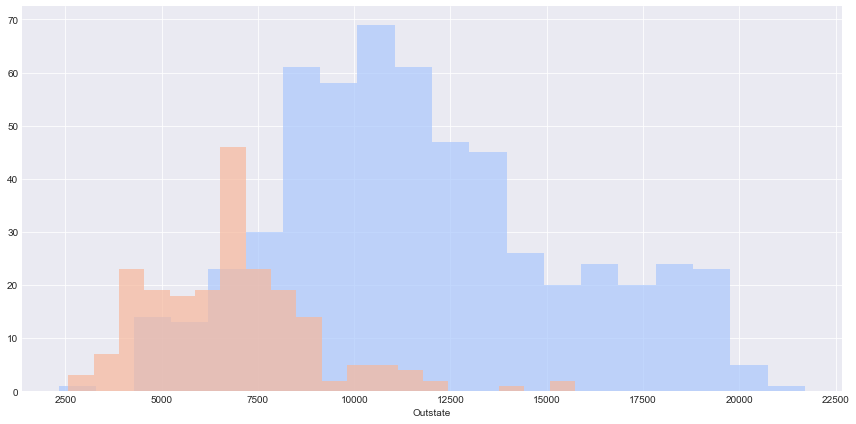

In [18]:
sns.set_style('darkgrid')
g =  sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

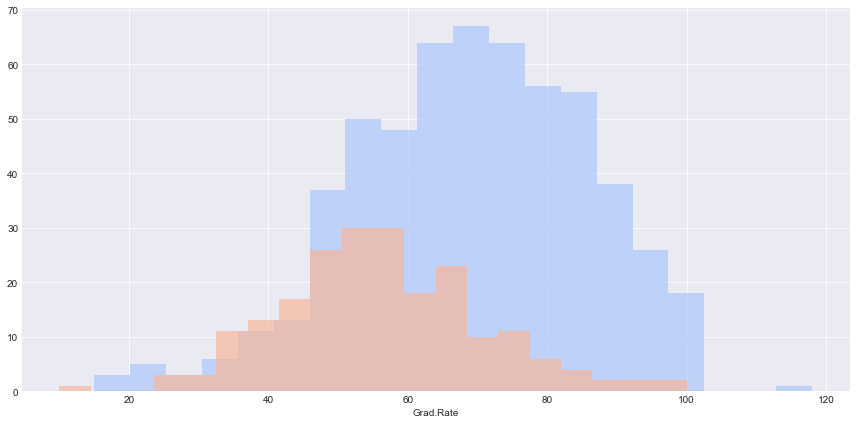

In [50]:
sns.set_style('darkgrid')
g =  sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [55]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster


In [54]:
df['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Jawwad Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


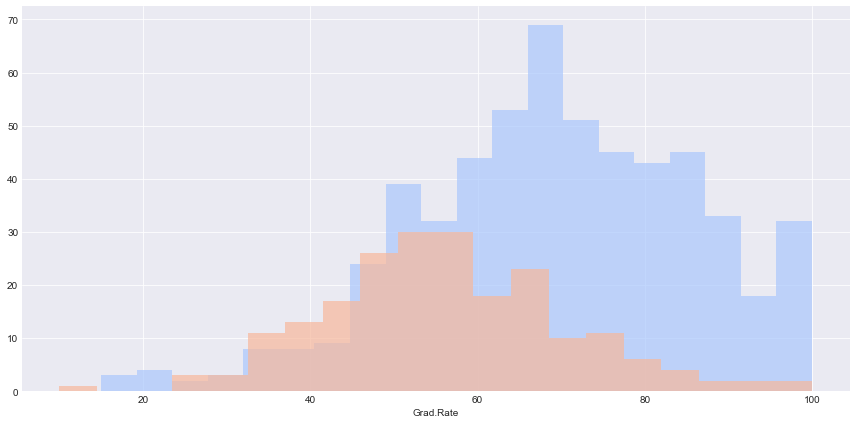

In [56]:
sns.set_style('darkgrid')
g =  sns.FacetGrid(df,hue='Private',palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=2)

In [59]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01, 7.93721973e-01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01]])

In [61]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [62]:
df['Cluster'] = df['Private'].apply(converter)

In [63]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(df['Cluster'],kmeans.labels_))
print('\n')
print(confusion_matrix(df['Cluster'],kmeans.labels_))

             precision    recall  f1-score   support

          0       0.21      0.65      0.31       212
          1       0.31      0.06      0.10       565

avg / total       0.29      0.22      0.16       777



[[138  74]
 [531  34]]
